<a href="https://colab.research.google.com/github/MasahiroAraki/MachineLearning3/blob/master/notebook/chap03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U scikit-learn --quiet

# 3. 識別 ー概念学習ー

## 3.2 概念学習とバイアス

カテゴリカルデータで決定木を作成

ライブラリの読み込み

In [1]:
# 3章で用いるライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

Contact-Lensesデータの取得

In [2]:
df = fetch_openml(name='contact-lenses')
df.data

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,none
9,pre-presbyopic,myope,no,normal,soft


In [3]:
X = df.data.drop('contact-lenses', axis=1)
y = df.data['contact-lenses']

 Contact-lensesデータの特徴値とクラス

|特徴|値|
|---|---|
|age (目の年齢)| {'young', 'pre-presbyopic', 'presbyopic'} (若年, 老眼前期, 老眼)|
|spectacle-prescrip (眼鏡)|{'myope', 'hypermetrope'} (近視, 遠視)|
|astigmatism (乱視)|{'no', 'yes'} (なし, あり)|
|tear-prod-rate (涙液分泌量)|{'reduced', 'normal'} (減少, 正常)|
|contact-lenses (クラス)|{'soft', 'hard', 'none'} (ソフト, ハード, なし)|


カテゴリカルデータを数値データに変換


*   特徴ベクトルを[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)で、各特徴の値毎のバイナリ値に変換



In [4]:
ohe =  OneHotEncoder(sparse_output=False)
X_enc = ohe.fit_transform(X)
ohe.get_feature_names_out()

array(['age_pre-presbyopic', 'age_presbyopic', 'age_young',
       'spectacle-prescrip_hypermetrope', 'spectacle-prescrip_myope',
       'astigmatism_no', 'astigmatism_yes', 'tear-prod-rate_normal',
       'tear-prod-rate_reduced'], dtype=object)

In [5]:
ohe.categories_

[array(['pre-presbyopic', 'presbyopic', 'young'], dtype=object),
 array(['hypermetrope', 'myope'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['normal', 'reduced'], dtype=object)]

In [6]:
X_enc[:5]

array([[0., 0., 1., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1.]])

決定木の学習と表示


*   ノードに書かれている分岐条件が成立するならば左、不成立ならば右のエッジを選ぶ
  * 左のエッジに True, 右のエッジに False のラベルが付いていると解釈すればよい
  * たとえば `tear-prod-rate_normal <= 0.5` は `tear-prod-rate` の値が `normal` でなければ（すなわち`reduced`であれば）、左のエッジを選ぶと解釈する
* ノードのclassは最頻のクラスを表す
* リーフのclassは分類結果を表す
* いずれも色で（最頻の）クラス、色の濃さでその割合を表す



木の表示は、scikit-learn ver0.21以降で導入された [sklearn.tree.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) メソッドを使います。

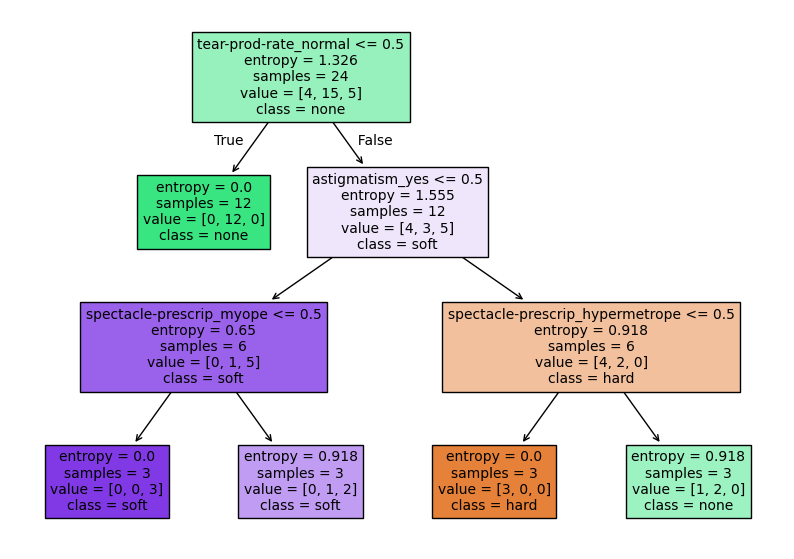

In [7]:
clf = DecisionTreeClassifier(min_samples_leaf=3, criterion="entropy", random_state=9)
clf.fit(X_enc, y)
plt.figure(figsize=(10,7)) #表示領域を(横, 縦)で指定
plot_tree(clf, filled=True, fontsize=10,
          feature_names=ohe.get_feature_names_out(),
          class_names=clf.classes_)
plt.savefig('s3-1.svg', format='svg', bbox_inches='tight')
plt.show()

## 例題 3.1

Weather.nominal データから決定木を作成せよ．

In [8]:
weather = fetch_openml(data_id=40739)
df = weather.data
df

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:1035: UserWarning: Version 1 of dataset weather.nominal is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/5216130/weather.nominal.arff
  warn(


,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


scikit-learn の新しいバージョンでは、ほとんどの場合にカテゴリで表されている正解情報に対して、自動的に LabelEncoder が適用されます。正解を表す数値との対応は、モデルの `classes_` 属性で得ることができます。

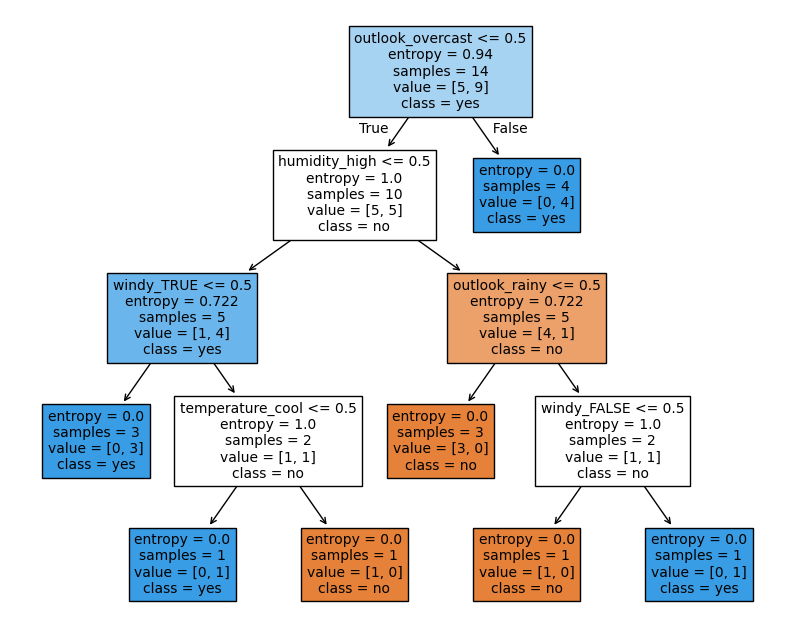

In [9]:
X = df.drop('play', axis=1)
y = df['play']

ohe = OneHotEncoder(sparse_output=False)
X_enc = ohe.fit_transform(X)

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_enc, y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, fontsize=10,
          feature_names=ohe.get_feature_names_out(),
          class_names=clf.classes_)
plt.savefig('s3-2.svg', format='svg', bbox_inches='tight')
plt.show()

## 数値特徴のカテゴリ化

Weather.numeric データの読み込み（Weather.nominal と少し異なることに注意）

In [10]:
weather2 = fetch_openml(name='Weather', version=1, parser='auto')
df = weather2.frame
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,True,no
1,sunny,80,90,True,no
2,overcast,83,86,True,yes
3,rainy,70,96,True,yes
4,rainy,68,80,True,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,True,no
8,sunny,69,70,True,yes
9,rainy,75,80,True,yes


* 図3.10 を作成するためのデータ
  * 情報獲得量が最大となる閾値を探す

In [11]:
df_humidity = df[['humidity', 'play']]
df_s = df_humidity.sort_values('humidity')
df_s

,humidity,play
6,65,yes
5,70,no
10,70,yes
8,70,yes
12,75,yes
9,80,yes
4,80,yes
0,85,no
2,86,yes
11,90,yes


## 例題 3.2

Weather.numeric データから決定木を作成せよ．


In [12]:
X_cat = df[['outlook', 'windy']]
X_num = df[['temperature', 'humidity']]
y =  df['play']

カテゴリカルデータを数値データに変換


*   特徴ベクトルのうち、outlook列とwindy列は[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)で、各特徴の値毎のバイナリ値に変換




In [13]:
ohe =  OneHotEncoder(sparse_output=False)
X_cat_enc = pd.DataFrame(ohe.fit_transform(X_cat), columns=ohe.get_feature_names_out(), dtype='int8')
X_cat_enc

,outlook_overcast,outlook_rainy,outlook_sunny,windy_True
0,0,0,1,1
1,0,0,1,1
2,1,0,0,1
3,0,1,0,1
4,0,1,0,1
5,0,1,0,1
6,1,0,0,1
7,0,0,1,1
8,0,0,1,1
9,0,1,0,1


In [14]:
X_enc = pd.concat([X_cat_enc, X_num], axis=1)
X_enc.columns

Index(['outlook_overcast', 'outlook_rainy', 'outlook_sunny', 'windy_True',
       'temperature', 'humidity'],
      dtype='object')

決定木の学習と表示




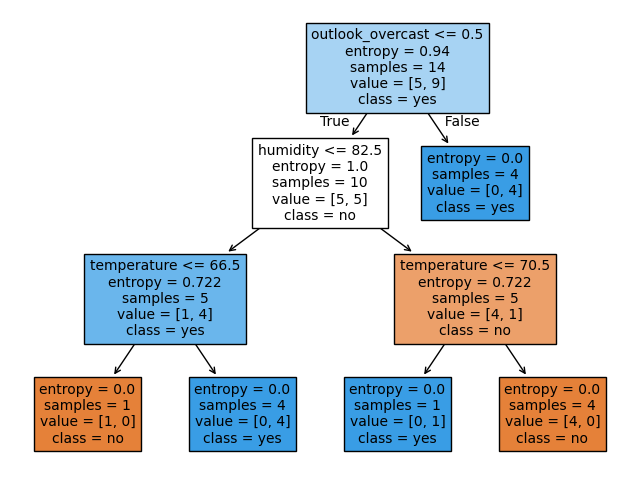

In [15]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_enc, y)
plt.figure(figsize=(8,6)) #表示領域を(横, 縦)で指定
plot_tree(clf, filled=True, fontsize=10,
          feature_names=X_enc.columns,
          class_names=clf.classes_)
plt.savefig('s3-3.svg', format='svg', bbox_inches='tight')
plt.show()

## 参考ページ

* Decision trees https://scikit-learn.org/stable/modules/tree.html

## 演習問題


### 3-1

Irisデータに対する決定木を作成せよ

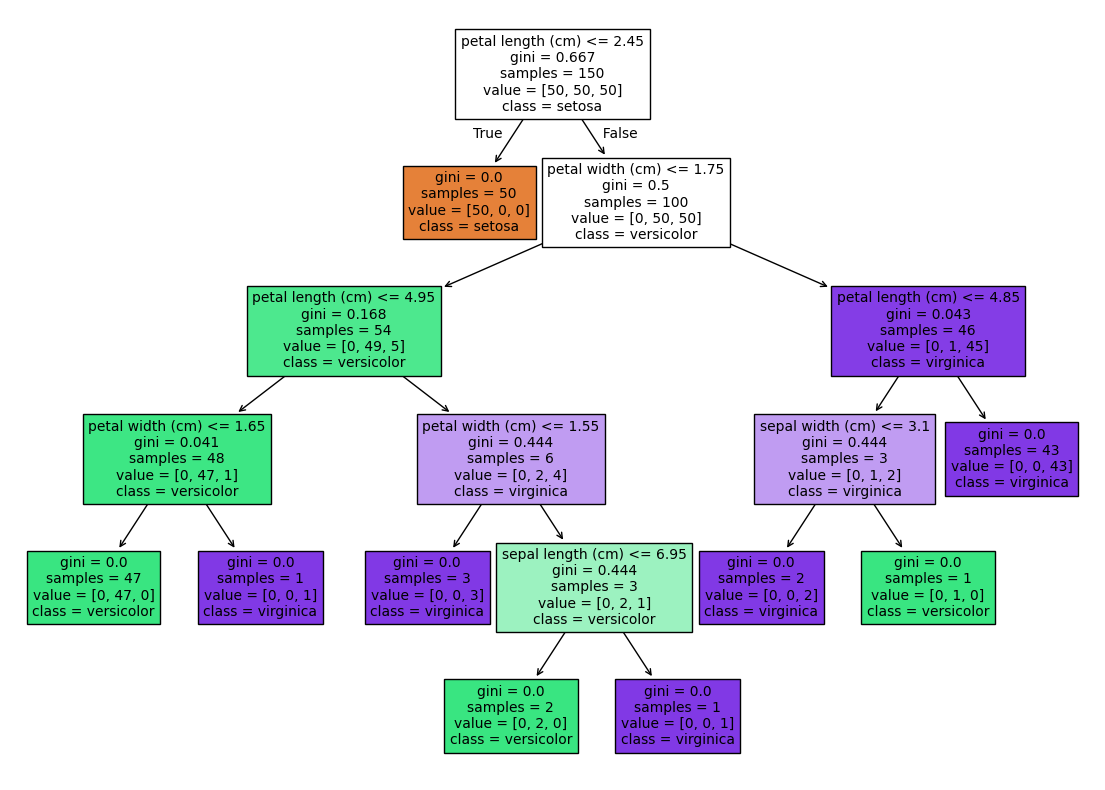

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(random_state=4)
clf.fit(X, y)

plt.figure(figsize=(14,10))
plot_tree(clf, filled=True, fontsize=10, feature_names=iris.feature_names, class_names=iris.target_names)
plt.savefig('a3-1.svg', format='svg', bbox_inches='tight')
plt.show()